In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from PIL import Image

In [2]:
train_ground_truth_df_2019 = pd.read_csv("/kaggle/input/isic-2019-challenge/ISIC_2019_Training_GroundTruth.csv")
test_df_2019  = pd.read_csv("/kaggle/input/isic-2019-challenge/ISIC_2019_Test_Metadata.csv")
train_df_2019  = pd.read_csv("/kaggle/input/isic-2019-challenge/ISIC_2019_Training_Metadata.csv")

In [3]:
print(train_ground_truth_df_2019.shape)
print(test_df_2019.shape)
print(train_df_2019.shape)

(25331, 10)
(8238, 4)
(25331, 5)


In [4]:
files= [test_df_2019, train_df_2019, train_ground_truth_df_2019]
        
for df in files:
  print(df.info())
  print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                8238 non-null   object 
 1   age_approx           7912 non-null   float64
 2   anatom_site_general  7583 non-null   object 
 3   sex                  7899 non-null   object 
dtypes: float64(1), object(3)
memory usage: 257.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB
None


<class 'pandas

In [5]:
print("Total images in Train set 2019: ",train_df_2019['image'].count())
print("Total images in Train Ground_truth set 2019: ",train_ground_truth_df_2019['image'].count())
print("Total images in Test set 2019: ",test_df_2019['image'].count())

Total images in Train set 2019:  25331
Total images in Train Ground_truth set 2019:  25331
Total images in Test set 2019:  8238


# Check null value

In [6]:
print('\n\nTrain set 2019 RAW missing values')
display(pd.DataFrame(train_df_2019.isnull().sum(), columns=['Null count']))
print('Train Ground Truth set 2019 RAW missing values')
display(pd.DataFrame(train_ground_truth_df_2019.isnull().sum(), columns=['Null count']))
print('Test set 2019 RAW missing values')
display(pd.DataFrame(test_df_2019.isnull().sum(), columns=['Null count']))



Train set 2019 RAW missing values


,Null count
image,0
age_approx,437
anatom_site_general,2631
lesion_id,2084
sex,384


Train Ground Truth set 2019 RAW missing values


,Null count
image,0
MEL,0
NV,0
BCC,0
AK,0
BKL,0
DF,0
VASC,0
SCC,0
UNK,0


Test set 2019 RAW missing values


,Null count
image,0
age_approx,326
anatom_site_general,655
sex,339


In [8]:
train_ground_truth_df_2019.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_GT_transformed = pd.melt(train_ground_truth_df_2019, id_vars='image', var_name='diagnosis', value_name='value').\
    sort_values('image').\
    reset_index(drop=True)

# Select rows when diagnosis == 1
train_GT_transformed = train_GT_transformed[train_GT_transformed['value'] == 1]
train_GT_transformed.drop('value', inplace=True, axis = 1)
train_GT_transformed.reset_index(inplace = True, drop = True)

In [5]:
train_GT_transformed.head()

,image,diagnosis
0,ISIC_0000000,NV
1,ISIC_0000001,NV
2,ISIC_0000002,MEL
3,ISIC_0000003,NV
4,ISIC_0000004,MEL


# Số lượng ảnh mỗi diagnosis

In [8]:
train_GT_transformed['diagnosis'].value_counts()

diagnosis
NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: count, dtype: int64

# Các size ảnh

In [10]:
image_folder = "/kaggle/input/isic-2019-challenge/ISIC_2019_Training_Input/ISIC_2019_Training_Input"

image_sizes = {}

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        img_path = os.path.join(image_folder, filename)
        with Image.open(img_path) as img:
            size = img.size  # (width, height)
            if size in image_sizes:
                image_sizes[size] += 1
            else:
                image_sizes[size] = 1


In [11]:
for size, count in image_sizes.items():
    print(f"Size {size}: {count} images")

Size (1024, 1024): 12414 images
Size (1024, 680): 1121 images
Size (600, 450): 10015 images
Size (1024, 768): 774 images
Size (1024, 681): 78 images
Size (1024, 685): 156 images
Size (1022, 767): 22 images
Size (1024, 682): 173 images
Size (1024, 764): 81 images
Size (824, 719): 16 images
Size (960, 645): 1 images
Size (722, 543): 1 images
Size (767, 576): 68 images
Size (1024, 677): 33 images
Size (1024, 676): 14 images
Size (1024, 689): 3 images
Size (1024, 679): 68 images
Size (919, 802): 54 images
Size (576, 768): 5 images
Size (1024, 678): 21 images
Size (718, 542): 2 images
Size (962, 674): 8 images
Size (1024, 684): 36 images
Size (1024, 750): 4 images
Size (1019, 717): 3 images
Size (1024, 683): 40 images
Size (1024, 858): 1 images
Size (1024, 675): 2 images
Size (1024, 818): 1 images
Size (1024, 673): 4 images
Size (1024, 930): 1 images
Size (1024, 861): 1 images
Size (1024, 674): 6 images
Size (833, 680): 1 images
Size (1024, 686): 17 images
Size (949, 626): 1 images
Size (96

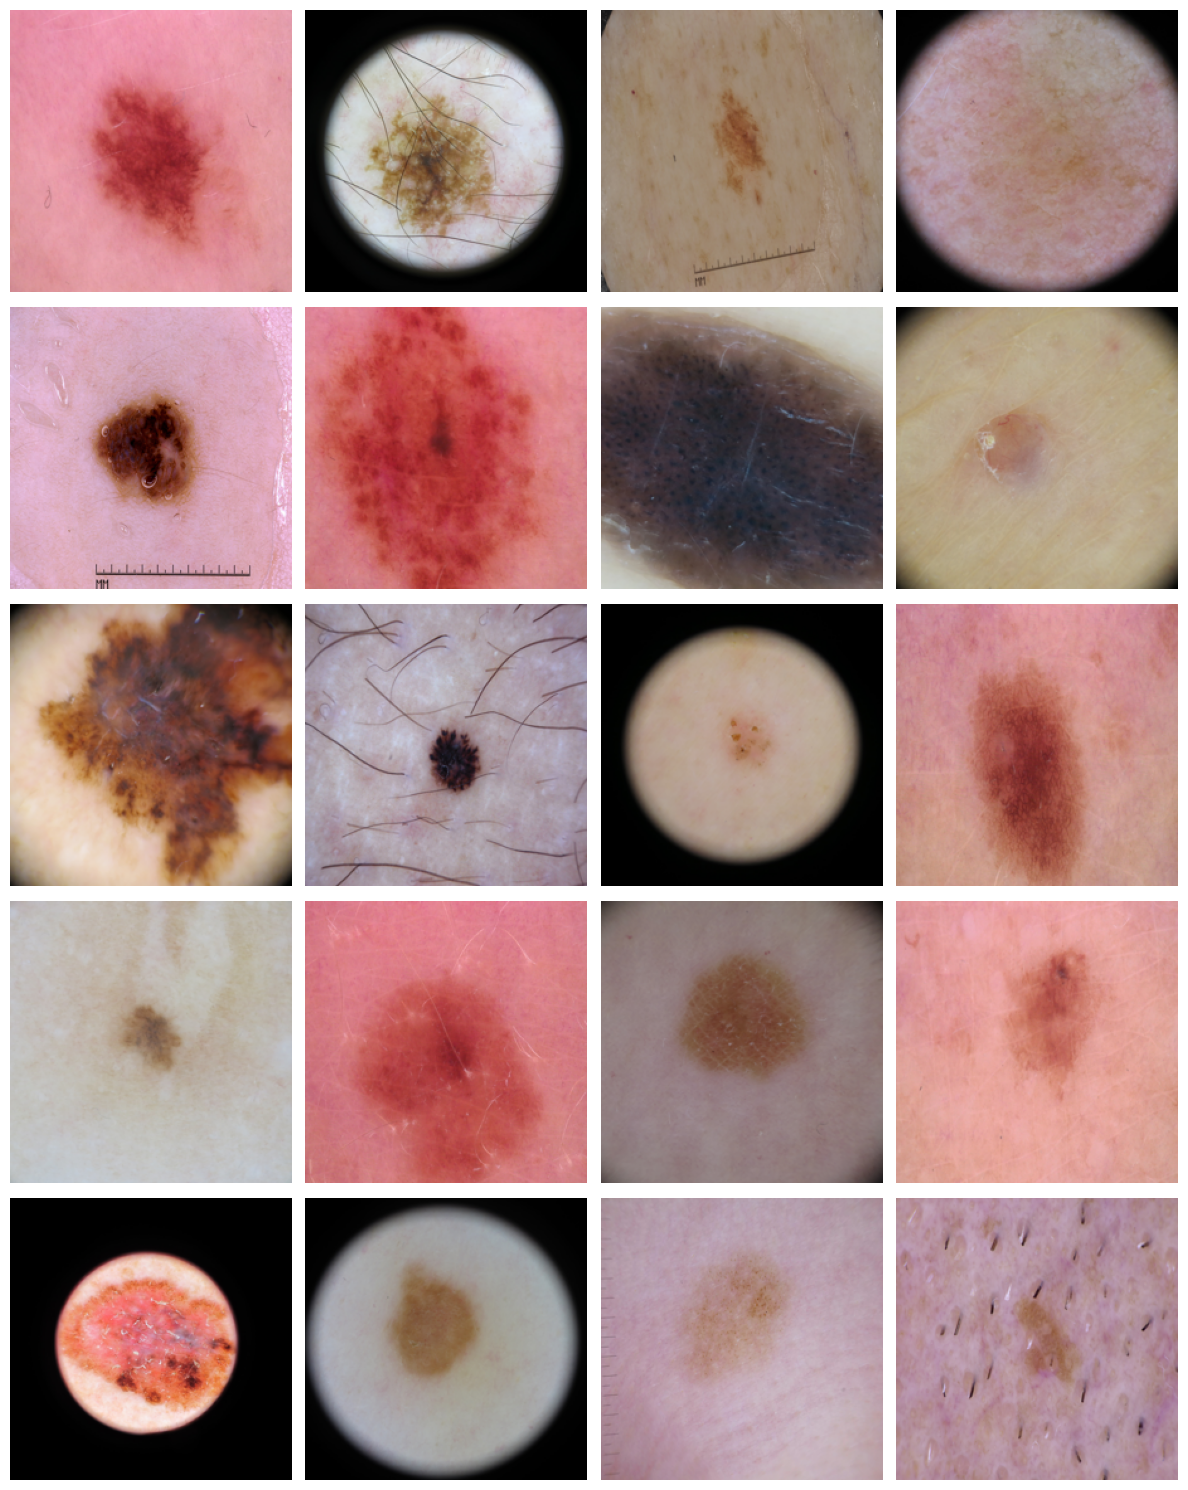

In [14]:
all_images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".jpg") or f.endswith(".png")]
selected_images = random.sample(all_images, 20)
resize_size = (224, 224)


fig, axes = plt.subplots(5, 4, figsize=(12, 15))

for ax, img_path in zip(axes.ravel(), selected_images):
    img = Image.open(img_path).resize(resize_size) 
    ax.imshow(img)
    ax.axis("off")  

plt.tight_layout()
plt.show()

# Kết hợp meta data


In [11]:
# Combine Train metadata and groundtruth variable.
train_GT_combined = train_GT_transformed.merge(train_df_2019, on='image')
train_GT_combined.drop('lesion_id', inplace=True, axis = 1)
train_GT_combined.head()

,image,diagnosis,age_approx,anatom_site_general,sex
0,ISIC_0000000,NV,55.0,anterior torso,female
1,ISIC_0000001,NV,30.0,anterior torso,female
2,ISIC_0000002,MEL,60.0,upper extremity,female
3,ISIC_0000003,NV,30.0,upper extremity,male
4,ISIC_0000004,MEL,80.0,posterior torso,male


In [14]:
train_GT_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   diagnosis            25331 non-null  object 
 2   age_approx           24894 non-null  float64
 3   anatom_site_general  22700 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


In [12]:
train_GT_combined.isna().sum()

image                     0
diagnosis                 0
age_approx              437
anatom_site_general    2631
sex                     384
dtype: int64

In [15]:
train_GT_combined.describe()

,age_approx
count,24894.000000
mean,54.028481
std,18.130971
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,85.000000


In [17]:
test_df_2019.describe()

,age_approx
count,7912.000000
mean,57.331269
std,18.224414
min,0.000000
25%,45.000000
50%,60.000000
75%,75.000000
max,85.000000
